In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("C:/Users/DELL G15/Desktop/kaggle/Scraping/cars_data.csv")

In [4]:
df.head(15)

,name,year,kilometrage,boite_de_vitesse,moteur,price
0,VOLKSWAGEN COCCINELLE,2016,124 401 km,Manuelle,Essence,16 850€
1,AUDI RS5 II,2018,69 876 km,Automatique,Essence,73 330€
2,FORD FOCUS IV,2022,72 184 km,Manuelle,Bicarburation essence bioéthanol,26 110€
3,CITROEN C3 AIRCROSS phase 2,2022,36 730 km,Manuelle,Essence,20 110€
4,FORD KUGA II phase 2,2020,55 736 km,Manuelle,Essence,23 280€
5,PEUGEOT 308 II,2017,67 833 km,Manuelle,Essence,15 840€
6,MAZDA CX-5 II phase 2,2020,84 181 km,Automatique,Diesel,32 650€
7,RENAULT MASTER III phase 2,2024,1 km,Manuelle,Diesel,41 700€
8,PORSCHE CAYMAN,2012,66 490 km,Automatique,Essence,42 490€
9,OPEL ADAM,2014,126 299 km,Manuelle,Essence,9 030€


In [5]:
df.dtypes

name                object
year                 int64
kilometrage         object
boite_de_vitesse    object
moteur              object
price               object
dtype: object

## Cleaning and preprocessing

Price column: Removing the Euro sign, space and converting to integer (we don't have floats)

In [6]:
df['price']=df['price'].str.replace("€","").str.replace(" ","")\
                       .astype(int)

Kilometrage column: Removing km, space and converting to integer

In [7]:
df["kilometrage"]= df["kilometrage"].str.replace("km","").str.replace(" ","")\
                                    .astype(int)

In [8]:
df.head()

,name,year,kilometrage,boite_de_vitesse,moteur,price
0,VOLKSWAGEN COCCINELLE,2016,124401,Manuelle,Essence,16850
1,AUDI RS5 II,2018,69876,Automatique,Essence,73330
2,FORD FOCUS IV,2022,72184,Manuelle,Bicarburation essence bioéthanol,26110
3,CITROEN C3 AIRCROSS phase 2,2022,36730,Manuelle,Essence,20110
4,FORD KUGA II phase 2,2020,55736,Manuelle,Essence,23280


Name column: Separating the brand and the model name into two separate columns for better exploration

In [9]:
df["brand"] = ""
df["model"] = ""

condition = df['name'].str.contains("LAND ROVER")

df.loc[condition, "brand"] = df.loc[condition, 'name'].str.split().str[:2].str.join(" ")
df.loc[condition, "model"] = df.loc[condition, 'name'].str.split().str[2:].str.join(" ")

df.loc[~condition, "brand"] = df.loc[~condition, 'name'].str.split().str[0]
df.loc[~condition, "model"] = df.loc[~condition, 'name'].str.split().str[1:].str.join(" ")

In [10]:
df.head()

,name,year,kilometrage,boite_de_vitesse,moteur,price,brand,model
0,VOLKSWAGEN COCCINELLE,2016,124401,Manuelle,Essence,16850,VOLKSWAGEN,COCCINELLE
1,AUDI RS5 II,2018,69876,Automatique,Essence,73330,AUDI,RS5 II
2,FORD FOCUS IV,2022,72184,Manuelle,Bicarburation essence bioéthanol,26110,FORD,FOCUS IV
3,CITROEN C3 AIRCROSS phase 2,2022,36730,Manuelle,Essence,20110,CITROEN,C3 AIRCROSS phase 2
4,FORD KUGA II phase 2,2020,55736,Manuelle,Essence,23280,FORD,KUGA II phase 2


Rearranging the columns 

In [11]:
df=df[['name','brand','model','year','kilometrage','boite_de_vitesse','moteur','price']]

In [12]:
df.head(15)

,name,brand,model,year,kilometrage,boite_de_vitesse,moteur,price
0,VOLKSWAGEN COCCINELLE,VOLKSWAGEN,COCCINELLE,2016,124401,Manuelle,Essence,16850
1,AUDI RS5 II,AUDI,RS5 II,2018,69876,Automatique,Essence,73330
2,FORD FOCUS IV,FORD,FOCUS IV,2022,72184,Manuelle,Bicarburation essence bioéthanol,26110
3,CITROEN C3 AIRCROSS phase 2,CITROEN,C3 AIRCROSS phase 2,2022,36730,Manuelle,Essence,20110
4,FORD KUGA II phase 2,FORD,KUGA II phase 2,2020,55736,Manuelle,Essence,23280
5,PEUGEOT 308 II,PEUGEOT,308 II,2017,67833,Manuelle,Essence,15840
6,MAZDA CX-5 II phase 2,MAZDA,CX-5 II phase 2,2020,84181,Automatique,Diesel,32650
7,RENAULT MASTER III phase 2,RENAULT,MASTER III phase 2,2024,1,Manuelle,Diesel,41700
8,PORSCHE CAYMAN,PORSCHE,CAYMAN,2012,66490,Automatique,Essence,42490
9,OPEL ADAM,OPEL,ADAM,2014,126299,Manuelle,Essence,9030


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,150.0,2019.220000,3.714420,2003.0,2018.0,2020.0,2022.00,2024.0
kilometrage,150.0,67214.180000,50674.886324,1.0,19796.0,64141.5,105514.25,203300.0
price,150.0,34715.733333,31549.332359,9030.0,18377.5,26840.0,37645.00,253850.0


## Visualizations

mean price by motor type

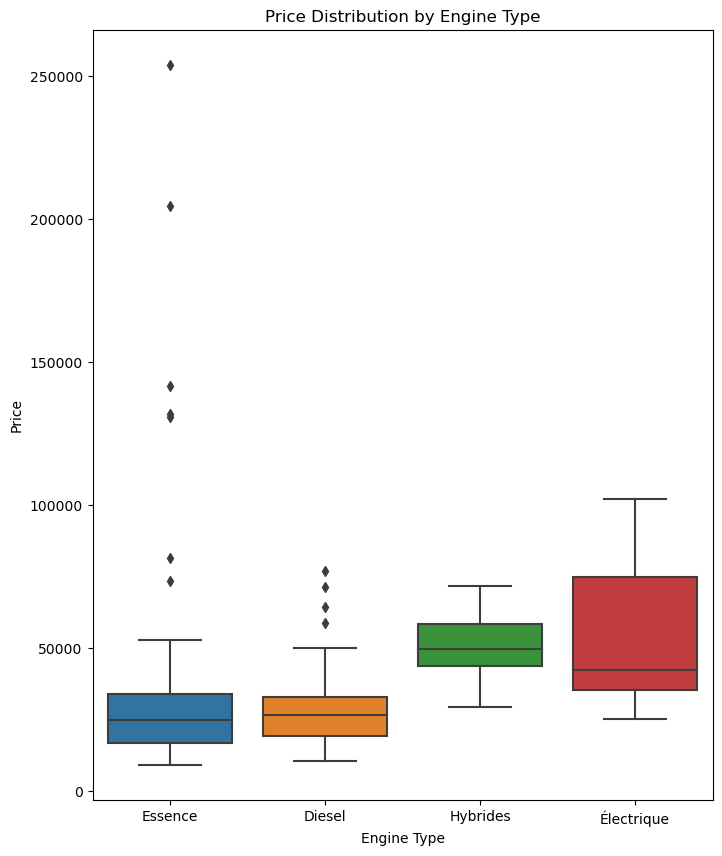

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 10))

sns.boxplot(data=df[~(df['moteur']=='Bicarburation essence bioéthanol')][['moteur','price']], x='moteur', y='price')

plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Price Distribution by Engine Type')

plt.show()

relationship between kilometrage and price  
Note: This is for ["PEUGEOT","AUDI","CITROEN"] cars (the most frequent cars in this df). It'd be misleading to condut the scatter plot on the entire df as it contains different brands and models, so at least we test by brand to minimize the error.

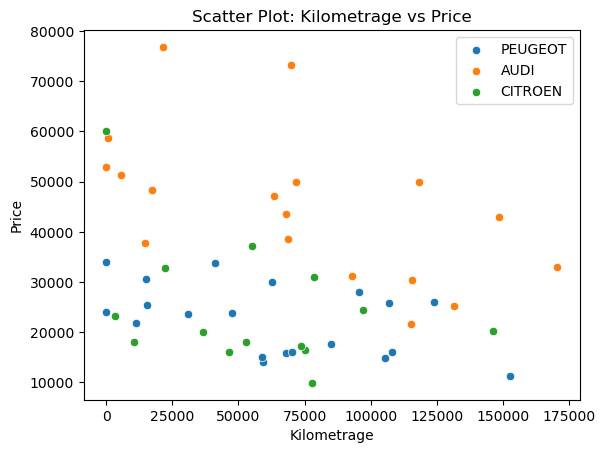

In [14]:
for brand in ['PEUGEOT','AUDI','CITROEN']:
    sns.scatterplot(data=df[df['brand'] == brand], x='kilometrage', y='price', label=brand)

plt.xlabel('Kilometrage')
plt.ylabel('Price')
plt.title('Scatter Plot: Kilometrage vs Price')
plt.legend()
plt.show()


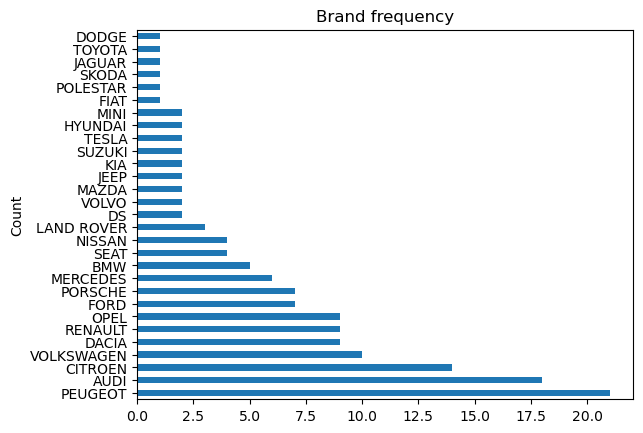

<Figure size 600x1000 with 0 Axes>

In [15]:
df['brand'].value_counts().sort_values(ascending=False).plot(kind="barh", xlabel='Count', ylabel='Brand', title='Brand frequency' )
plt.figure(figsize=(6, 10))
plt.show()

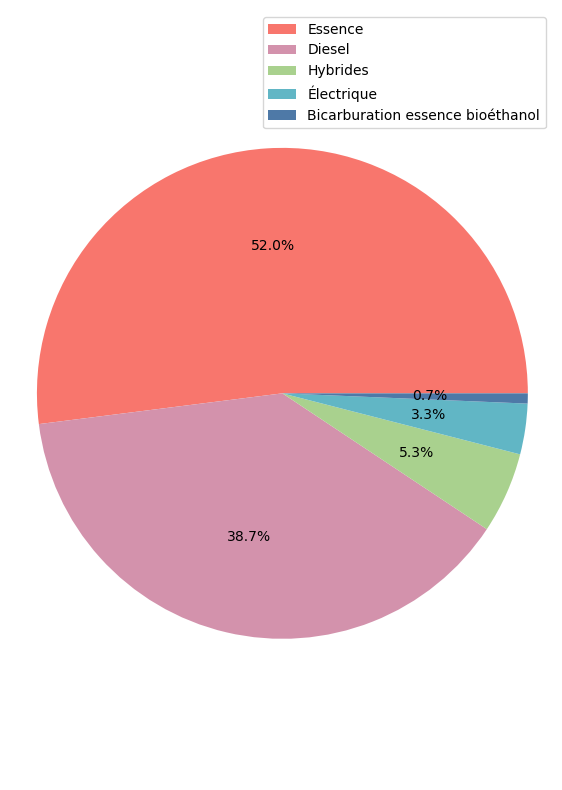

In [16]:
plt.figure(figsize=(7, 10))
colors = ['#F8766D', '#D392AC', '#A9D18E', '#61B6C5', '#4E79A7', '#F1BC3D']

moteur_counts = df['moteur'].value_counts()
moteur_labels = moteur_counts.index

plt.pie(moteur_counts, autopct='%1.1f%%', colors=colors)
plt.yticks([])
plt.axis('equal')
plt.legend(moteur_labels)
plt.show()



price distribution by brand

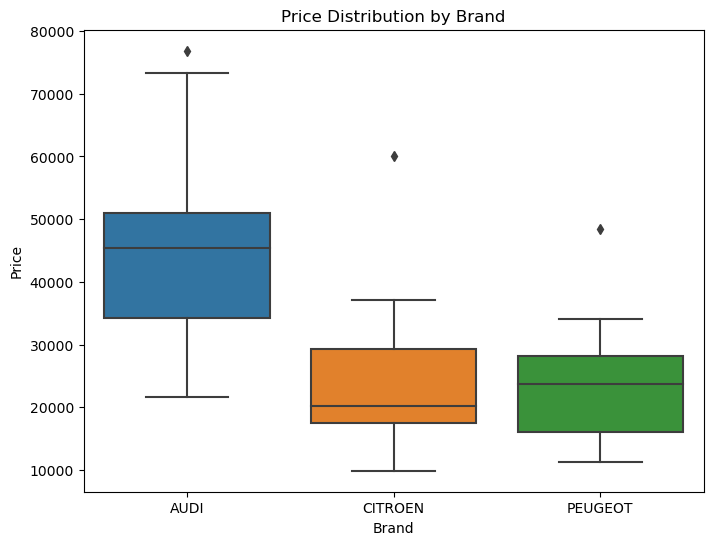

In [29]:
brands = ['PEUGEOT', 'AUDI', 'CITROEN']
filtered_df = df[df['brand'].isin(brands)]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x='brand', y='price')

plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand')

plt.show()

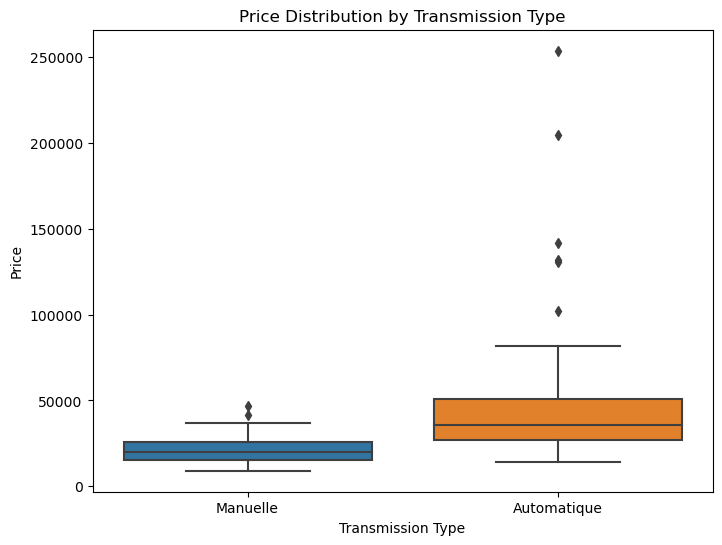

In [30]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df[['boite_de_vitesse','price']], x='boite_de_vitesse', y='price')

plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Price Distribution by Transmission Type')

plt.show()